# Análisis Exploratorio &rarr; Tabla Ingresos

En este notebook se creó un análisis inicial a la tabla ingresos, con el fin de encontrar patrones en las ventas del negocio.

In [26]:
# Importe de librerías
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [27]:
# Conexión con mySQL
load_dotenv()
url = f"mysql+mysqlconnector://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(url=url)

In [28]:
query = "SELECT * FROM ingresos"
df = pd.read_sql(query, con=engine)
df.head(5)

,Boleta,Fecha,Tipo,id_cliente,id_producto,id_acompañamiento,id_extra,Cantidad,Precio,Descuento,Total,Dia_del_Año,Dia_de_la_Semana,Dia_del_Mes,Numero_de_Semana,Numero_de_Mes,Año
0,0,2022-07-02,ALMUERZOS,0,59.0,0,0,1.0,4000.0,0,4000.0,183,5,2,26,7,2022
1,1,2022-07-02,ALMUERZOS,1,59.0,0,0,1.0,4000.0,0,4000.0,183,5,2,26,7,2022
2,1,2022-07-02,ALMUERZOS,1,54.0,1,1,1.0,4000.0,0,4000.0,183,5,2,26,7,2022
3,2,2022-07-02,ALMUERZOS,2,59.0,2,0,2.0,4000.0,0,8000.0,183,5,2,26,7,2022
4,3,2022-07-03,ALMUERZOS,3,6.0,3,0,3.0,4000.0,0,12000.0,184,6,3,26,7,2022


## Información de los datos

In [29]:
df['Boleta'] = df['Boleta'].astype(str)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['id_cliente'] = df['id_cliente'].astype(str)
df['id_producto'] = df['id_producto'].astype(str)
df['id_acompañamiento'] = df['id_acompañamiento'].astype(str)
df['id_extra'] = df['id_extra'].astype(str)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Descuento'] = df['Descuento'].astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Boleta             2471 non-null   object        
 1   Fecha              2471 non-null   datetime64[ns]
 2   Tipo               2471 non-null   object        
 3   id_cliente         2471 non-null   object        
 4   id_producto        2471 non-null   object        
 5   id_acompañamiento  2471 non-null   object        
 6   id_extra           2471 non-null   object        
 7   Cantidad           2471 non-null   float64       
 8   Precio             2471 non-null   float64       
 9   Descuento          2471 non-null   float64       
 10  Total              2471 non-null   float64       
 11  Dia_del_Año        2471 non-null   int64         
 12  Dia_de_la_Semana   2471 non-null   int64         
 13  Dia_del_Mes        2471 non-null   int64         
 14  Numero_d

Hoy 3 de Febrero de 2024 existe un total de 2471 filas y 16 columnas en la tabla ingresos, es importante destacar que la recolección de datos comenzó en Julio de 2022, pero no hubo continuidad hasta Marzo 2023, por lo que, en este análisis exploratorio la tabla (o dataframe) ingresos será filtrado desde Marzo 2023 hasta Diciembre 2023.

Las filas de los ingresos representan el pedido realizado por un cliente, este pedido puede ser un almuerzo que contiene plato principal, acompañamiento y extra o puede ser un almuerzo que tiene plato único y extra, además se incorporaron otros ingresos que pueden ser productos que se vendieron que no entran en la categoría de almuerzos.

## Análisis de los datos

In [30]:
df_filtrado = df[(df['Año']==2023) & (df['Numero_de_Mes']>=3)]

df_filtrado[['Dia_del_Año','Dia_de_la_Semana','Dia_del_Mes',
    'Numero_de_Semana','Numero_de_Mes','Cantidad','Precio','Total']].describe()

,Dia_del_Año,Dia_de_la_Semana,Dia_del_Mes,Numero_de_Semana,Numero_de_Mes,Cantidad,Precio,Total
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,227.621005,3.347032,15.519178,32.753425,8.004110,1.889498,4755.444110,6307.139543
std,84.848807,2.008463,8.811842,12.130644,2.759506,2.972637,1266.934399,3366.111759
min,60.000000,0.000000,1.000000,9.000000,3.000000,1.000000,300.000000,1000.000000
25%,160.000000,2.000000,8.000000,23.000000,6.000000,1.000000,5000.000000,5000.000000
50%,235.500000,4.000000,15.000000,34.000000,8.000000,1.000000,5000.000000,5000.000000
75%,298.000000,5.000000,23.000000,43.000000,10.000000,2.000000,5000.000000,6000.000000
max,365.000000,6.000000,31.000000,52.000000,12.000000,36.000000,7500.000000,69600.000000


array([[<Axes: title={'center': 'Dia_del_Año'}>,
        <Axes: title={'center': 'Dia_de_la_Semana'}>,
        <Axes: title={'center': 'Dia_del_Mes'}>],
       [<Axes: title={'center': 'Numero_de_Semana'}>,
        <Axes: title={'center': 'Numero_de_Mes'}>,
        <Axes: title={'center': 'Cantidad'}>],
       [<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Total'}>, <Axes: >]], dtype=object)

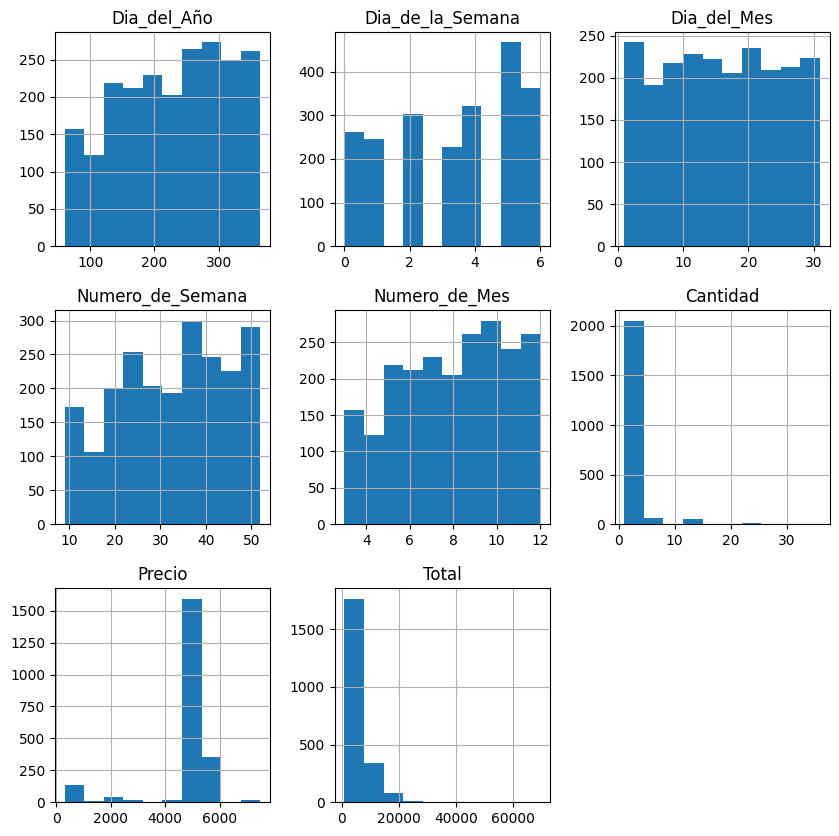

In [36]:
df_filtrado[['Dia_del_Año','Dia_de_la_Semana','Dia_del_Mes',
    'Numero_de_Semana','Numero_de_Mes','Cantidad','Precio','Total']].hist(figsize=(10,10))

**Podemos inferir de la tabla de descripción y de los histogramas lo siguiente:**

1) Dia_del_Año: Contempla los 365 días de un año normal, en este caso el rango es [60, 365], en el histograma se puede apreciar un incremento en los últimos días del año en comparación a los primeros días evaluados. 

2) Dia_de_la_Semana: Contempla los 7 días de la semana, siendo 0 el lunes y 6 el domingo, la mayor cantidad de pedidos es para el día 5 (sábado).

3) Dia_del_Mes: Contempla del 1 al 31 dependiendo del mes, la cantidad de datos en el extremo izquierdo del histograma nos podría indicar que los pedidos aumentan a inicios de los meses.

4) Numero_de_Semana: Contempla las 52 semanas del año, es este caso el rango es [9, 52], al igual que en Dia_del_Año en el histograma se aprecia un incremento en las últimas semanas del año.

5) Numero_de_Mes: Contempla los 12 meses del año, en este caso el rango es [3, 12], al igual que la columna anterior se aprecia un incremento en los úlitmos meses del año.

6) Cantidad: Contempla las unidades de almuerzos (u otros productos) en un pedido, es bastante interesante que tanto el 25% y el 50% de los datos tengan valor 1, esto se nota con claridad en el promedio que es 1.89 unidades, en este conjunto existe una alta disepersión de los datos, ya que, la desviación estándar es de casi 3 unidades.

7) Precio: Contempla los distintos precios de los almuerzos (u otros productos), esta es la variable más controlada que se puede tener, ya que, el negocio ofrece sus almuerzos en un rango de precios entre [4000, 7000] y los precios menores a 4000 representan a las ventas de otros productos.

8) Total: Contempla el total del pedido (Precio * Cantidad), el precio promedio de cada pedido es de $6300 aproximandamente y es bastante raro de ver totales que superen los $20000

<Axes: >

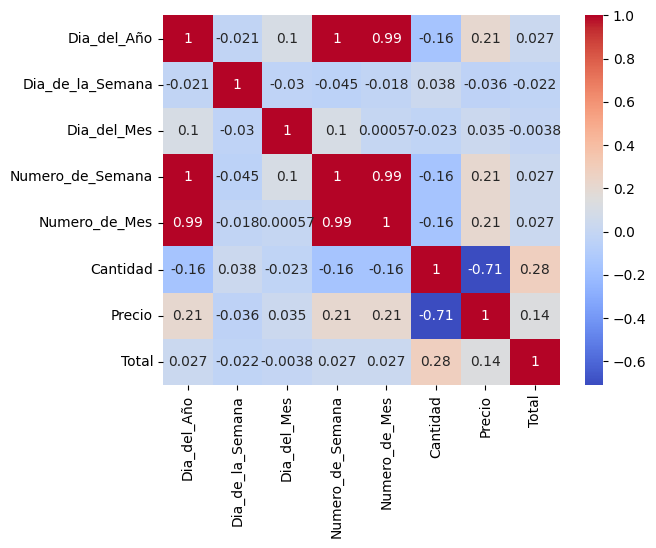

In [38]:
matriz_corr = df_filtrado[['Dia_del_Año','Dia_de_la_Semana','Dia_del_Mes',
                            'Numero_de_Semana','Numero_de_Mes','Cantidad','Precio','Total']].corr()
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm")

* Es bastante fácil identificar que las correlaciones entre Dia_del_Año, Numero_de_Semana y Numero_de_Mes son 1 o bastante cercanas, porque representan al mismo valor (Fecha).

* La otra vista interesante es la relación entre Cantidad y Precio que es -0.71, es algo bastante simple de entender que a menor precio mayor será cantidad de los productos.


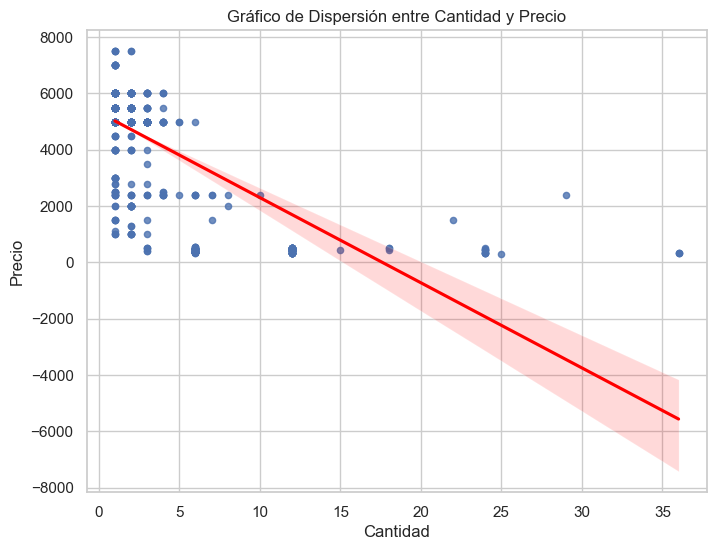

In [50]:
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))

sns.regplot(x=df_filtrado['Cantidad'], y=df_filtrado['Precio'], data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})

plt.xlabel('Cantidad')
plt.ylabel('Precio')
plt.title('Gráfico de Dispersión entre Cantidad y Precio')

# Mostrar el gráfico
plt.show()

In [55]:
def indicadores_ingresos(df, periodo_tiempo, Categorizar=False, fecha_inicio=None, fecha_fin=None):
    
    # Definir valores predeterminados para fecha_inicio y fecha_fin si no se proporcionan
    if fecha_inicio is None:
        fecha_inicio = df['Fecha'].min()
    if fecha_fin is None:
        fecha_fin = df['Fecha'].max()

    # Definir columnas a filtrar y a agrupar
    filtrar = [periodo_tiempo, 'Total', 'id_cliente', 'Boleta', 'Cantidad', 'id_producto']
    agrupar = [periodo_tiempo]

    # Actualizar si se va a categorizar
    if Categorizar:
        agrupar.append('Tipo')
        filtrar.append('Tipo')

    # Filtrar el DataFrame
    df_filtrado = df[(df['Fecha'] >= fecha_inicio) & (df['Fecha'] <= fecha_fin)]
    
    # Realizar agrupación y cálculos de indicadores
    df_indicadores = df_filtrado[filtrar].groupby(agrupar).agg({
        'Total': 'sum',
        'id_cliente': 'nunique',
        'Boleta': 'nunique',
        'Cantidad': 'sum',
        'id_producto': 'nunique'
    })

    # Renombrar columnas
    df_indicadores = df_indicadores.rename(columns={'id_cliente': 'N°_Clientes', 'id_producto': 'N°_Productos'})

    # Calcular indicadores adicionales
    df_indicadores['Ticket_Promedio'] = df_indicadores['Total'] / df_indicadores['Boleta']
    df_indicadores['Productos_Boleta'] = df_indicadores['Cantidad'] / df_indicadores['Boleta']
    df_indicadores['Gasto_Cliente'] = df_indicadores['Total'] / df_indicadores['N°_Clientes']

    # Resetear el índice para obtener una estructura de DataFrame más plana
    return df_indicadores.reset_index(), Categorizar

def graficar_indicadores(df_indicadores, periodo_tiempo, Categorizar = False):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

    if Categorizar: 
        almuerzos = df_indicadores[df_indicadores['Tipo']=='ALMUERZOS']
        otros = df_indicadores[df_indicadores['Tipo']=='OTROS']

        ax1.plot(almuerzos[periodo_tiempo], almuerzos['Total']/1000000.0, color='red', marker='o', label='Almuerzos')
        ax1.plot(otros[periodo_tiempo], otros['Total']/1000000.0, color='black', marker='x', label='Otros')
        ax1.legend(loc = 'upper left')

        ax2.plot(almuerzos[periodo_tiempo], almuerzos['Ticket_Promedio'], color='red', marker='o', label='Almuerzos')
        ax2.plot(otros[periodo_tiempo], otros['Ticket_Promedio'], color='black', marker='x', label='Otros')
        ax2.legend(loc = 'upper left')

        ax3.plot(almuerzos[periodo_tiempo], almuerzos['N°_Clientes'], color='red', marker='o', label='Almuerzos')
        ax3.plot(otros[periodo_tiempo], otros['N°_Clientes'], color='black', marker='x', label='Otros')
        ax3.legend(loc = 'upper left')
        

    else:
        ax1.plot(df_indicadores[periodo_tiempo], df_indicadores['Total']/1000000.0, color='red', marker='o', label='Total')
        ax2.plot(df_indicadores[periodo_tiempo], df_indicadores['Ticket_Promedio'], color='blue')
        ax3.plot(df_indicadores[periodo_tiempo], df_indicadores['N°_Clientes'], color='green')
        
        
    ax1.set_title(f'Ingresos por {periodo_tiempo}')
    ax1.set_xlabel(f'{periodo_tiempo}')
    ax1.set_ylabel('Ingresos (Mill)')
    
    ax2.set_title(f'Ticket Promedio por {periodo_tiempo}')
    ax2.set_xlabel(f'{periodo_tiempo}')
    ax2.set_ylabel('Ticket Promedio')
    
    ax3.set_title(f'Número de Clientes por {periodo_tiempo}')
    ax3.set_xlabel(f'{periodo_tiempo}')
    ax3.set_ylabel('Clientes')

    plt.tight_layout()
    plt.show()


In [53]:
# Estadisticas Generales periodo 2023

fecha_inicio = '2023-01-01'
fecha_fin = '2023-12-31'

df1 = df[(df['Fecha'] >= fecha_inicio) & (df['Fecha'] <= fecha_fin)]

df2 = df1[['Fecha','Total']].groupby('Fecha').sum().reset_index()

ingresos = df1['Total'].sum()
dias = df1['Fecha'].nunique()
clientes = df1['id_cliente'].nunique()
almuerzos_qty = df1[df1['Tipo']=='ALMUERZOS']['Cantidad'].sum()
almuerzos_ing = df1[df1['Tipo']=='ALMUERZOS']['Total'].sum()
boletas = df1['Boleta'].nunique()

menor_ingreso = df2[df2['Total']==df2['Total'].min()]['Total'].sum()
menor_fecha = df2[df2['Total']==df2['Total'].min()]['Fecha'].max()
mayor_ingreso = df2[df2['Total']==df2['Total'].max()]['Total'].sum()
mayor_fecha = df2[df2['Total']==df2['Total'].max()]['Fecha'].max()

print('RESUMEN 2023')
print(f'Ingresos Totales: ${int(ingresos):,}')
print(f'Ingresos por Almuerzos: ${int(almuerzos_ing):,} ({((100*almuerzos_ing)/ingresos): .2f}% del total )')
print(f'Ingresos por Otros: ${int(ingresos - almuerzos_ing):,} ({((100*(ingresos - almuerzos_ing))/ingresos): .2f}% del total )')
print(f'Días trabajados: {dias} ({((100*dias)/365): .2f}% del año )')
print(f'Total de Clientes: {clientes}')
print(f'Almuerzos vendidos: {int(almuerzos_qty):,}')
print('------------------------------------------------------')
print(f'El día con menor ingresos fue {menor_fecha} con ${int(menor_ingreso):,}')
print(f'El día con mayor ingresos fue {mayor_fecha} con ${int(mayor_ingreso):,}')
print('------------------------------------------------------')
print('Métricas 2023:')
print(f'Ingreso diario promedio: ${int((ingresos)/(dias)):,}')
print(f'Ticket Promedio: ${int(ingresos/boletas):,}')


RESUMEN 2023
Ingresos Totales: $14,962,135
Ingresos por Almuerzos: $13,664,500 ( 91.33% del total )
Ingresos por Otros: $1,297,635 ( 8.67% del total )
Días trabajados: 336 ( 92.05% del año )
Total de Clientes: 215
Almuerzos vendidos: 2,668
------------------------------------------------------
El día con menor ingresos fue 2023-05-04 00:00:00 con $4,000
El día con mayor ingresos fue 2023-10-21 00:00:00 con $149,000
------------------------------------------------------
Métricas 2023:
Ingreso diario promedio: $44,530
Ticket Promedio: $10,551


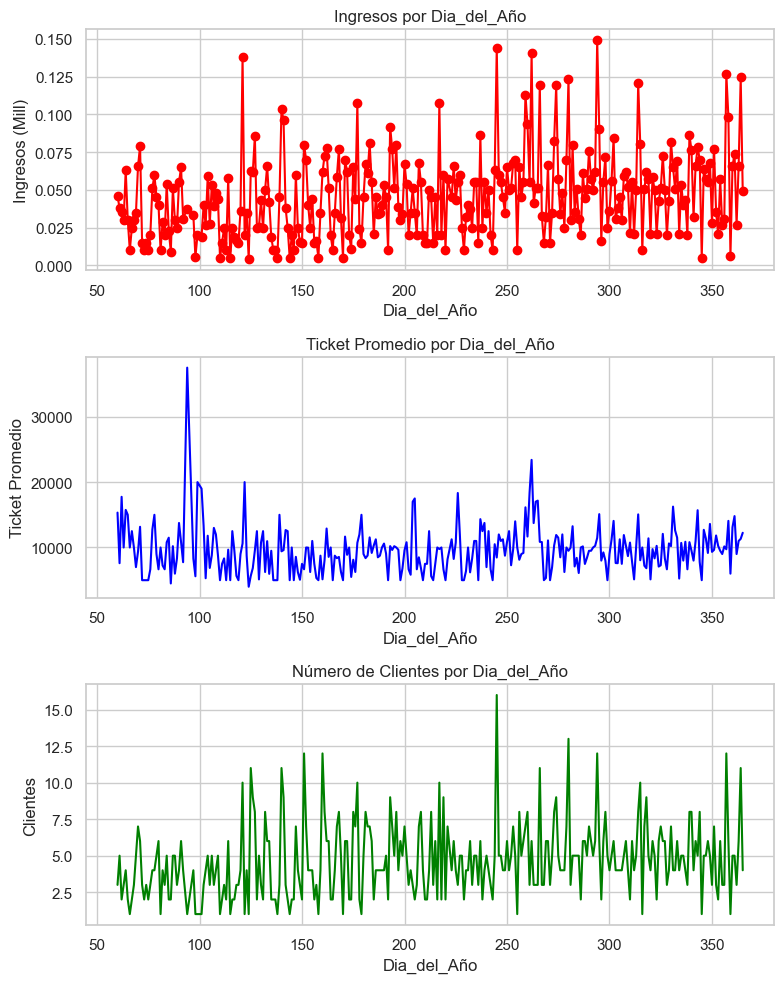

In [58]:
# Mostrar Ingresos por DiaAño 2023

periodo_tiempo = 'Dia_del_Año'
fecha_inicio = '2023-03-01'
fecha_fin = '2023-12-31'

df_indicadores, categorizar = indicadores_ingresos(df, periodo_tiempo, False, fecha_inicio, fecha_fin)
graficar_indicadores(df_indicadores, periodo_tiempo, categorizar)



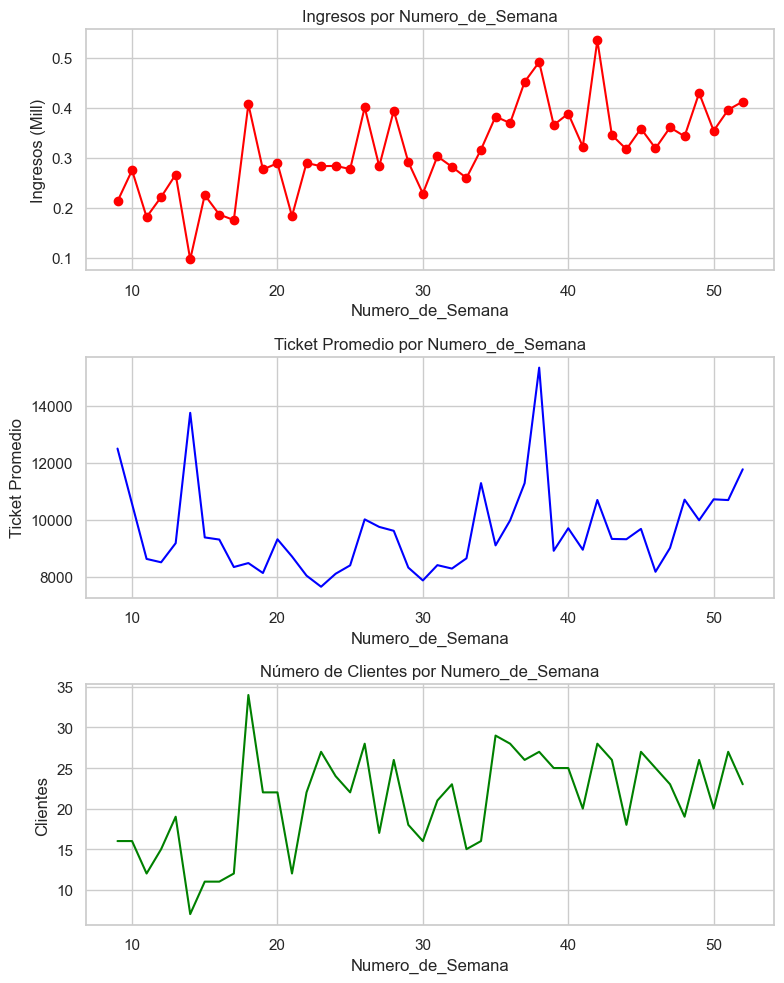

In [60]:
# Mostrar indicadores Semanales 2023

periodo_tiempo = 'Numero_de_Semana'
fecha_inicio = '2023-03-01'
fecha_fin = '2023-12-31'

df_indicadores, categorizar = indicadores_ingresos(df, periodo_tiempo, False, fecha_inicio, fecha_fin)
graficar_indicadores(df_indicadores, periodo_tiempo, categorizar)


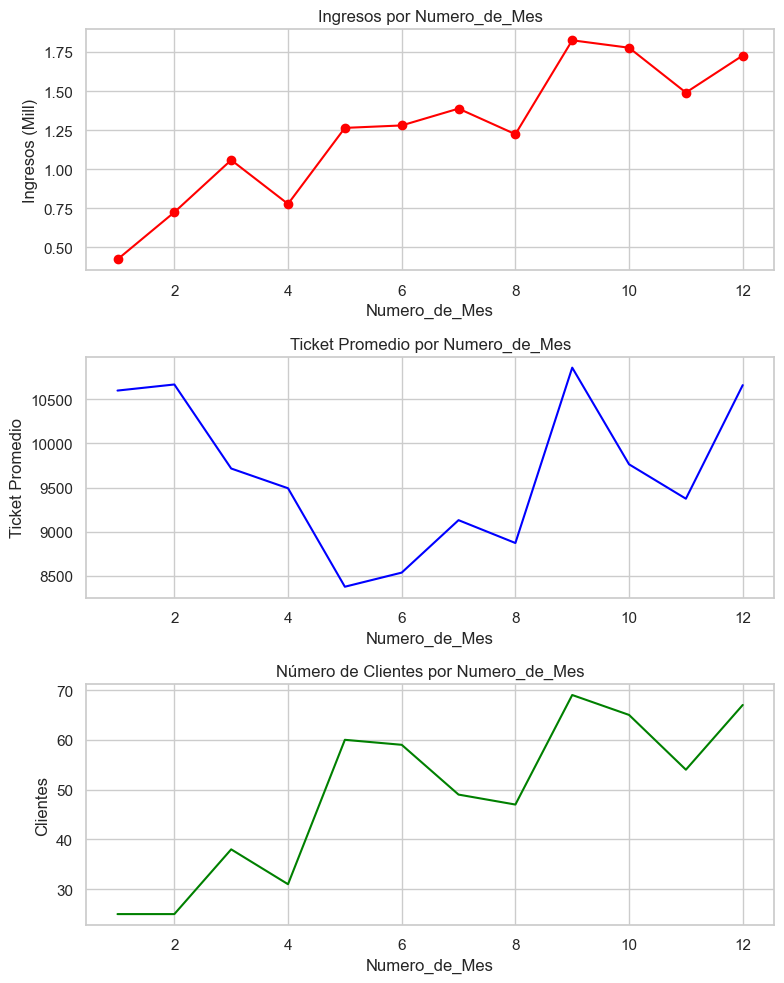

In [62]:
# Mostrar indicadores Mensuales 2023

periodo_tiempo = 'Numero_de_Mes'
fecha_inicio = '2023-01-01'
fecha_fin = '2023-12-31'

df_indicadores, categorizar = indicadores_ingresos(df, periodo_tiempo, False, fecha_inicio, fecha_fin)
graficar_indicadores(df_indicadores, periodo_tiempo, categorizar)
